## 1)Problem Statement

A **credit score** is a numerical representation of an individual's creditworthiness, typically ranging from 300 to 850. It helps lenders assess the risk of lending money to individuals. Higher credit scores indicate better creditworthiness, meaning the individual is more likely to repay loans on time, while lower scores indicate higher risk.

### Key Factors That Determine a Credit Score:
1. **Payment History (35%)**:
   - This is the most significant factor. It includes whether you’ve paid past credit accounts on time. Late payments, defaults, bankruptcies, and foreclosures negatively impact your score.

2. **Credit Utilization (30%)**:
   - This is the ratio of current credit card balances to the total credit limit. It’s recommended to keep credit utilization below 30%. For example, if your total credit limit is $10,000 and your balance is $3,000, your utilization rate is 30%.

3. **Length of Credit History (15%)**:
   - The longer your credit history, the better. This includes the age of your oldest account, the average age of all accounts, and how long it’s been since you used certain accounts.

4. **Credit Mix (10%)**:
   - Having a variety of credit types (e.g., credit cards, mortgages, auto loans) can help your score. It shows you can manage different types of debt.

5. **New Credit (10%)**:
   - Opening several new credit accounts in a short period can negatively impact your score. Each time you apply for credit, a hard inquiry is made, which can lower your score temporarily.

Credit risk model building is the process of developing statistical or machine learning models to assess the likelihood that a borrower or customer will default on their financial obligations. These models are essential in banking, lending, and financial services as they help institutions quantify the level of risk associated with granting loans or credit to customers. A critical model within this domain is the Probability of Default (PD) model, which estimates the likelihood that a borrower will default on a loan within a specific timeframe, often one year.

Dataset Location - https://github.com/venkatareddykonasani/Datasets/tree/master/Give%20me%20some%20Credit

## 2)Data Exploration, Validation, Cleaning

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Import Give me some Credit\cs-training.csv

In [2]:
loans=pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Give%20me%20some%20Credit/cs-training.csv")

In [9]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Sr_No                                 150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   monthly_utilization                   150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [10]:
loans.head(10)

,Sr_No,SeriousDlqin2yrs,monthly_utilization,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [27]:
# To check for null/missing values in the dataset
loans.isnull().sum()

,0
Sr_No,0
SeriousDlqin2yrs,0
monthly_utilization,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,29731
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


### Categorical and Discrete Variables Exploration

In [12]:
loans['SeriousDlqin2yrs'].value_counts()

,count
SeriousDlqin2yrs,
0,139974
1,10026


In [18]:
loans["age"].value_counts()

,count
age,
49,3837
48,3806
50,3753
47,3719
63,3719
...,...
102,3
109,2
107,1


In [ ]:
loans['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

,count
NumberOfTime30-59DaysPastDueNotWorse,
0,126018
1,16033
2,4598
3,1754
4,747
5,342
98,264
6,140
7,54


In [19]:
loans["NumberOfOpenCreditLinesAndLoans"].value_counts()

,count
NumberOfOpenCreditLinesAndLoans,
6,13614
7,13245
5,12931
8,12562
4,11609
9,11355
10,9624
3,9058
11,8321


In [14]:
loans["NumberOfTimes90DaysLate"].value_counts()

,count
NumberOfTimes90DaysLate,
0,141662
1,5243
2,1555
3,667
4,291
98,264
5,131
6,80
7,38


In [20]:
loans["NumberRealEstateLoansOrLines"].value_counts()

,count
NumberRealEstateLoansOrLines,
0,56188
1,52338
2,31522
3,6300
4,2170
5,689
6,320
7,171
8,93


In [21]:
loans["NumberOfTime60-89DaysPastDueNotWorse"].value_counts()

,count
NumberOfTime60-89DaysPastDueNotWorse,
0,142396
1,5731
2,1118
3,318
98,264
4,105
5,34
6,16
7,9


In [23]:
loans["NumberOfDependents"].value_counts()

,count
NumberOfDependents,
0.0,86902
1.0,26316
2.0,19522
3.0,9483
4.0,2862
5.0,746
6.0,158
7.0,51
8.0,24


### Continuous Variable Exploration

#### Column = "monthly_utilization"

{'whiskers': [<matplotlib.lines.Line2D at 0x79cce9f3f230>,
 'caps': [<matplotlib.lines.Line2D at 0x79cce9f3f8f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79cce9f3ee70>],
 'medians': [<matplotlib.lines.Line2D at 0x79cce9f3ffb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79cce9f40350>],
 'means': []}

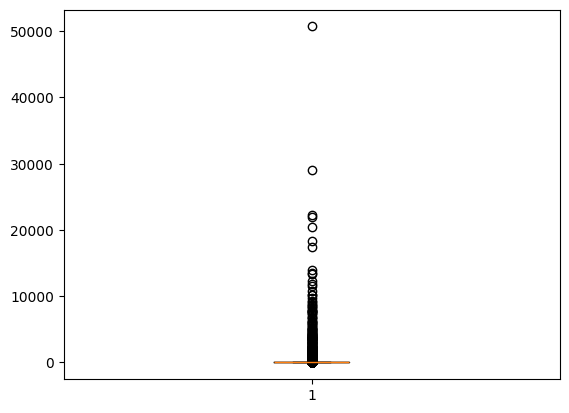

In [31]:
# To check for outliers in the dataset
plt.boxplot(loans["monthly_utilization"])  

In [38]:
loans["monthly_utilization"].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

,monthly_utilization
0.1,0.002969
0.2,0.019222
0.3,0.043461
0.4,0.083181
0.5,0.154181
0.6,0.271493
0.7,0.445136
0.8,0.698857
0.9,0.981278
1.0,50708.000000


In [41]:
util_percentiles = loans["monthly_utilization"].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
round(util_percentiles, 2)

# 97% of customers have utilization ≤ 1.0
# After that extreme outliers exist

,monthly_utilization
0.10,0.00
0.20,0.02
0.30,0.04
0.40,0.08
0.50,0.15
0.60,0.27
0.70,0.45
0.80,0.70
0.90,0.98
0.95,1.00


#### Column = "MonthlyIncome"

{'whiskers': [<matplotlib.lines.Line2D at 0x79ccbb8261b0>,
 'caps': [<matplotlib.lines.Line2D at 0x79ccbb8267e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79ccbb825f10>],
 'medians': [<matplotlib.lines.Line2D at 0x79ccbb826de0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79ccbb827110>],
 'means': []}

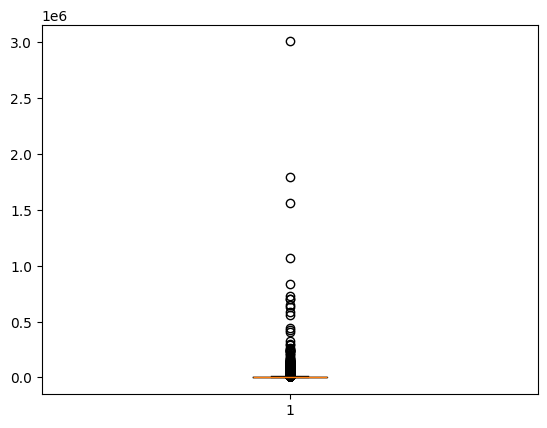

In [37]:
plt.boxplot(loans["MonthlyIncome"].dropna())


In [43]:
# count the missing value percentage in MonthlyIncome column
missing_income = loans["MonthlyIncome"].isnull().sum()
print(f"Count of missing values in MonthlyIncome: {missing_income}")
missing_percentage = missing_income / len(loans) * 100
print(f"Percentage of missing values in MonthlyIncome: {missing_percentage:.2f}%")

Count of missing values in MonthlyIncome: 29731
Percentage of missing values in MonthlyIncome: 19.82%


#### Column = "DebtRatio"

{'whiskers': [<matplotlib.lines.Line2D at 0x79cce9fe06b0>,
 'caps': [<matplotlib.lines.Line2D at 0x79cce9fe2c00>,
 'boxes': [<matplotlib.lines.Line2D at 0x79cce9fe0e60>],
 'medians': [<matplotlib.lines.Line2D at 0x79cce9fe2f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x79cce9fe37d0>],
 'means': []}

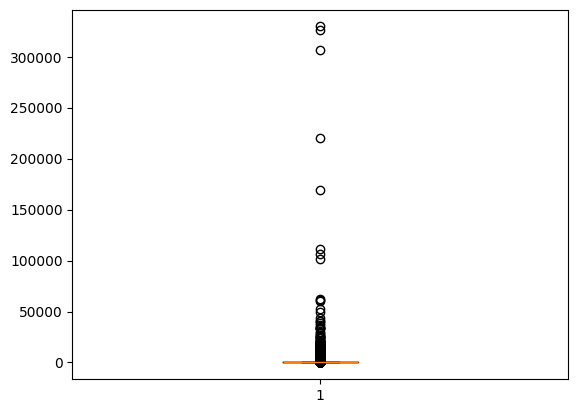

In [45]:
plt.boxplot(loans["DebtRatio"])

### Data Cleaning